# **Assignment #2**
### **Gender Recognition from Ekush Bengali Handwritten Digits using Neural Network**

###**Introduction:-**

Optical Character Recognition (OCR) is one of the major topics of Natural Language Processing (NLP). A widespread use of Deep Learning can be obsereved in the field of OCR. Neural Networks are computation models inspired from human brains. Training deep Neural Networks is called Deep Learning which is a subset of supervised Machine Learning.

In this experiment, different Neural Network models with different hyperparameter settings to classify handwritten digits of male/female classes of Ekush dataset are trained. After the training phase the best model is tested with test data which is split from the whole dataset. Finally, all models are thoroughly compared based on their hyperparameter configurations.

###**Dataset:-**

Ekush is a multipurpose dataset which consists of total 673,482 character instances. It can be utilized for character recognition, gender identification and forensic investigation purposes.

*Dataset Link:*  https://shahariarrabby.github.io/ekush/#download


Snapshot from Ekush:

<div align="center">
<img src="https://drive.google.com/uc?id=1GhuJfYchOjfNoBtwkpWivPRQinegMYwy" width="600">
</div>

###**Logistic Regression & Neural Network:-**

Logistic regression is a supervised learning algorithm which tries to minimize the error between training data and the predictions.

Logistic regression passes the output of linear regression to  sigmoid function. Here $\beta$ and $b$ are parameters named weight vector and bias respectively. These parameters get updated till the cost function is minimized through gradient descent optimization algorithm.

The prediction $h_\beta (x_i)$ ranges between 0 to 1 inclusive. If $x$ represents training features,

$h_\beta(x) = \sigma(\beta^T x + b)$

Equation of the Sigmoid function is,

$\sigma(z) = \frac{1}{1 + \exp^{-z}}$

Equation for the Cross Entropy cost function is, 

$J(\beta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\beta (x_i) – (1 – y_i) log(1-h_\beta (x_i))]$

Using Cross Entropy with Sigmoid output, the resultant function becomes convex which is elligible for gradient descent convergence.

So parameter updation executed until the following condition is fulfilled,

$\frac{dJ(\beta)}{d\beta} = \frac{1}{m} \sum_{i=1}^Nx_i(h_\beta(x_i)-y_i) = 0$

Here, $m$ is the size of the training set.

Gradient descent weight updation equation is written below,

$\beta := \beta - \alpha \frac{dJ(\beta)}{d\beta}$

Here, $\alpha$ is the learning rate indicating how fast or slow the optimizer will try to converge.

Neural Network is basically a stack of units that perform logistic regression and passes the output to the next layers. These outputs are the output of activation functions.  

There are at least one input, one hidden (fully connected) and one output layer in a Neural Network. The internal layers are called hidden layers because the true values of those layers for the training set can't be observed.

Simple Neural Network structure is shown below:

<div align="center">
<img src="https://drive.google.com/uc?id=1_U5ywB15itLi_EoH28OvsrUJJKqPYxht" width="200">
</div>

<div align="center">
<img src="https://drive.google.com/uc?id=1jDgBL0GmghhB0P8ljOzfw92FGafYopUX" width="800">
</div>

Here superscripts represent the layer numbers.

Activations functions can be linear or non-linear. Linear functions are not elligible for backpropagation and linear operation of a collection of layers or neurons produces a linear decision boundary. This is similar to linear regression.

For generating complex non-linear decision boundary, non-linear activations are used. They have non-zero derivatives which makes backpropagation possible.

Equations for multiple logistic regression units are converted to a vectorized equation for backpropagation.

###**Hyperparameters:-**

Hyperparameters are elements which influence the parameters but do not get updated during training. Some significant hyperparameters in this experiment are:

*    **Batch Size/ Minibatch:** Number of examples in one iteration.
*    **Number of Iteration:** One iteration represents one mini-batch forward & backward pass. That means a parameter (weights and biases) update.
*    **Optimizer:** The parameter updation is executed during backpropagation with the help of gradient descent optimizer by calculating partial derivatives of the cost function with respect to current weight. Parameters are updated only in the training phase of the model. The goal of the optimizer is to converge or to reach the global maxima of the loss
function. Notable optimizers which are successor of gradient descent are Stochastic Gradient Descent (SGD), SGD+Momentum, Adagrad, Adadelta, RMSProp, Adam etc. Adam has an adaptive learning rate and doesn’t have the issues faced when using SGD.

    Different optimizers performance comparison is shown below:

<div align="center">
<img src="https://drive.google.com/uc?id=1fjsoFvvBRChEEyNY2jp47_aSQ8eoHrWN" width="300">
</div>

*    **Learning Rate:** The learning rate is a constant indicating how fast or slow the optimizer will be updating the parameters. If it is too small then it will not be efficient for the optimizer to converge. If it is large then the optimizer may diverge which means, never reaching the global maxima.
*    **Loss Function:** Also known as criterion function. The derivative of this function is used in parameter updation equation. This derivative is zero in the global optima. Loss function computes the error for a single training example. Cross Entropy, Mean Square Error etc are notable loss functions.
*    **Epoch:** One epoch means running through the whole dataset once
$epochs = iterations \div \frac{totaldata}{minibatch}$  
*    **Number of Layers:** A Neural Network can have multiple layers. It must have a single layer and input layer is not considered. More layers create better feature learning capability.
*    **Number of Neurons:** A single layer is consisted of many neurons. More neurons usually result in better performance.
*    **Activation Funtion:**  Activation function activates or deactivates hidden layer neurons of neural network according to a threshold. 
Sigmoid, Tanh, ReLU, LeakyReLU etc are notable non-linear activation functions. Sigmoid and Tanh are saturating activations because for too small or large input values the gradient is close to zero. Using these activations in deep networks result in vanishing gradient problem which means the weights and biases don't get updated. For negative inputs the gradient of ReLU becomes zero. This problem is named dying ReLU. LeakyReLU is created to resolve this problem. Its equation is $max(0.1x,x)$. Different activation functions can be used in different layers in a Neural Network. Equations and graphs for different activations are shown below:

<div align="center">
<img src="https://drive.google.com/uc?id=1friUQG7FVmnYOf7fde8H1Mp1IftxGMHm" width="250">
</div>


###**Experimental Setup:-**

**Preprocessing:-**

There are total 30830 images in the dataset. For this experiment, this dataset was split into 90% for training and 10% for test set. Images were normalized to keep the values between 0 to 1. All images were resized to 28x28 pixels. The input dimension is 28x28 and there is only 1 unit as output of the binary classification. The images have only one channel.

**Configuration Summary:-**

According to the discussion in the optimizer part of the hyperparameter section, initially I prefered trying out the Adam optimizer. But for logistic regression on this dataset, RMSprop has a decent record of performance. So, I tried it and it is present in one of the best settings.

Though learning rate values in 0.001 to 0.00001 range were tested in most of the settings, models with 0.0001 learning rate achieved the best accuracy and loss.

The best configurations have number of epoch set between 80 to 150 range. Too large number of epochs were not selected to keep the training duration as low as possible for each setting. Increasing the epoch amount till 100 helped gain better accuracy for respective combinations. Training with too much epoch resulted in worse accuracy.

Tuning number of layers is a crucial part of neural network training. A single layer neural network is far more efficient than logistic regression or a single neuron.

Increasing number of layers enhance the feature learning capability of the neural network. But adding too many layers result in overfitting which means model can generalize well on training data but fits the validation data poorly. Basically oveerfitting is caused by too much complex non-linear decision boundary. There are many techniques to avoid overfitting such as regularization but those are not a priority in this  experiment.

Number of layers ranging between two to five was chosen for different models. It was observed that most of the deep models with five or more hidden layers started showing overfitting. So, too deep models weren't attempted in this experiment. The best 4 models for this dataset have 3-4 layers.

For the layers, number of hidden units or neurons was chosen randomly in monotonically increasing or decreasing or non-monotonic sequence. 100 to 500 neurons were selected for each layer. I tried with neuron amount of power of 2 such as 128, 256 etc in a few configurations but didn't bother much about this because there is no hard and fast rule regarding this. 

Neural networks can be trained with different activations in different layers. Tanh, ReLU, Sigmoid, LeakyReLU and some other activations from the pytorch libraries were used with the layers but Tanh and LeakyReLU combinations are predominant in the best 4 models. 

Binary Cross Entropy (BCE) Loss function has been chosen for all the settings as the task is a binary classificaion. There are other loss functions which could be tested but in this specific problem domain, using Cross Entropy loss is mostly preferred.

The hyperparameter configurations of different models are shown in the table below:

|Config No.| Num of Epoch |Optimizer|Learning Rate|Num of Layers|Num of Neurons|Activation Function|
|:------| :---------: |:-----:|:----:|:----:|:----:|----:|
| 1| 100 | Adam | 0.0001 | 3|100,100,100 |LeakyReLU,ReLU,Tanh | 
| 2| 100 | Adam |  0.0001  | 4|300,300,300,300 |Tanh,Tanh,LeakyReLU,LeakyReLU |
| 3| 100 | RMSprop |  0.0001  | 3|300,500,400 |LeakyReLU,Tanh,Tanh |
| 4| 100 | Adam |   0.0001   | 3|200,400,300 |Tanh,LeakyReLU,LeakyReLU |


###**Result Analysis:-**

**Model Performance:-**

Table describing performance of different settings is shown below:

|Config No.| Num of Epoch|Optimizer|Learning Rate|Num of Layers|Num of Neurons|Activation Function| Accuracy| Loss|
|:------| :--------: |:-----:|:----:|:----:|:----:|:----:|:----:|----:|
| 1| 100 | Adam  | 0.0001  | 3|100,100,100 |LeakyReLU,ReLU,Tanh | 62.35 | 0.62 | 
| 2| 100 | Adam |  0.0001  | 4|300,300,300,300 |Tanh,Tanh,LeakyReLU,LeakyReLU | 63.77 | 0.58 | 
| 3| 100 | RMSprop |   0.0001 | 3|300,500,400 |LeakyReLU,Tanh,Tanh | 61.7| 0.55 |
| 4| 100 | Adam |   0.0001 | 3|200,400,300 |Tanh,LeakyReLU,LeakyReLU | 62.7| 0.59 | 


From the above tables it can be observed that, configuration-4 is the best performing model. 

Performance based on hyperparameter choice for this dataset are discussed below:

Among all settings with three layers, Adam optimizer with 0.0001 learning rate outperformed all other choices which couldn't make the model reach 58 or higher accuracy in 100 epochs. So those hyperparameter choices weren't applied on deeper models. Yet, it was observed that 0.00001 learning rate has more potential to converge better given longer training time. SGD+momentum can also bring decent outcomes with more epochs.

Settings with 0.1,0.001 and 0.00001 learning rate gained worse accuracy compared to 0.0001 if other hyperparameters were kept constant.

Increasing number of epochs above 150 did not help the best model achieve better accuracy. Till 150 epochs the accuracy scores were oscillating a lot. It can be noticed that the loss for every model keeps decreasing but accuracy does not increase anymore after 100-150 epochs.

All the best models are consisted of Tanh and LeakyReLU activation but their order in layers obviously matters. Tanh-Tanh-LeakyReLU performs better than LeakyReLU-ReLU-Tanh and LeakyReLU-Tanh-Tanh combinations. In the experiments it was noticed that, replacing Tanh with Sigmoid even in a single layer decreased the accuracy by a large margin. But the most surprising fact is, using LeakyReLU in all the layers could not beat the best four models in terms of loss. From the behaviour of the models, the existence of issues like the dying ReLU and saturating Sigmoid and Tanh are noticed.

Three and four layer models showed identical performance in case of suboptimal hyperparameter choices for four layers. But all these models outperformed the two layer ones. Still, there is no clear pattern in this case. From different settings it can be noticed that number of layers alone can not indicate model efficiency. Number of neurons is also to be taken to consideration. So, we analyze these two hyperparameter choices together.

Firstly, settings with more layers with too few neurons lag behind less layer settings. If we take layers with 30,50,50,50 neurons, the model would perform worse than 100,50,30 model. But in this experiment Config-1 with 100,100,100 gained better accuracy than Config-3 with 300,500,400 neurons. The order of activations can be the reason behind this.

If number of layers is kept constant, then different monotonic or non-monotonic orders of fixed neuron amount for each layer does not influence model efficiency too much. Example: 300,500,400 and 300,400,500 won't have significant difference in accuracy and loss. 

The highest number of neurons among all the layers do not impact performance as much as the lowest number of neurons among all the layers. If the lowest number is too low then the model performs poorly compared to the model which doesn't have too high number of neurons in any layer but has more neurons as its lowest number of neurons. But in the experiment, 300,500,400 (model-3) lags behind 200,400,300 (model-4) in accuracy. Again, the order of activations are responsible for this.

If the lowest number of neurons is constant, then more neurons added to highest number of neurons layer boosts performance. For instance, 300,700,500 shows better efficiency compared to 300,500,400.

So, it's not as much plain and simple as the idea that number of neurons of all layers added indicate the performance of a neural network.

The four best models are compared below with respective loss curves:

<div align="center">
<img src="https://drive.google.com/uc?id=148PTm29WhtIRiP_NHITuHcw6SfWA2FSL" width="800">
</div>

Config-1 and 4 loss curves are more linear than the loss curve of the other two. Yet, Config-3 loss curve is more different than the other three. The RMSprop activation the reason behind this.

From the graphs, it can be noticed that Setting-3 rerached the lowest loss. But from the table it is clear that it lags behind in accuracy which is surprising. During 30-40 epochs, Model-3 loss curve is parallel to x-axis.

Overall both Adam and RMSprop are the most efficient optimizers along with a learning rate of 0.0001 .  Adding more epochs, we can notice the algorithm getting stuck at local optima. The accuracy also declines. However, more epochs keep improving the loss.

It should be mentioned that the consequence of stacking consecutive Tanh or Sigmoid activation layers is the vanishing gradient problem. Such setting in case of ReLU results in the dying ReLU problem. To avoid these, the activation combinations were chosen cautiously.

Contrary to wisely built different hyperparameter combinations, none of the models could surpass accuracy score of 64. Also the results for many configurations have so much similarity that it is difficult to come to any conclusion.

**Test set prediction:-**

Setting-2 could correctly predict 9 out of 10 given samples of the test set. This code is just below the code of setting-2 loss graph plot.

###**Conclusion:-**

In this experiment, I have built different hyperparameter tuned Neural Network models to classifiy digits of male/female classes of the Ekush dataset. RMSProp and Adam optimizers with 0.0001 learning rate were proven to be the most effective. In the experiment it was observed that a specific combination of Tanh and LeakyReLU yielded to the best results. Hence, it is proved that the zero gradient problems of Sigmoid and dying ReLU problem of ReLU hampers accuracy and to avoid this, the activation combination of Config-2 was effective. Around 100 epochs are enough for the best models. Too high epoch is simply redundant as the accuracy doesn't seem to improve. But the loss keeps decreasing. The highest accuracy in this experiment is 63.77 which is not satisfactory at all if we consider the strength of a 3-4 layer Neural Network. The dataset must have certain defects or more effective preprocessing is needed.






In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import pandas as pd


def get_data(path):
    df = pd.read_csv(path)
    return df.as_matrix() 

data_sets = dsets.DatasetFolder('/content/gdrive/MyDrive/Ekushe', 
                                   loader=get_data, extensions='.csv')
train_loader = torch.utils.data.DataLoader(data_sets,
                                          batch_size=32,
                                          shuffle=False,
                                          num_workers=4)

In [ ]:
# Library
import pandas as pd
import numpy as np

# Load Data
train1 = pd.read_csv("/content/gdrive/MyDrive/Ekushe/Male/maleDigits.csv")

# Separating Data and Label

X_train1 = train1.drop(labels = ["label"],axis = 1)
Y_train1 = np.full(X_train1.shape[0], 0)
# Y_train1 = train1["label"]

# Normalize the data
X_train1 = X_train1 / 255.0

# Reshape the array into 28 x 28 pixel
X_train1 = X_train1.values.reshape(-1,28,28,1)

In [ ]:
Y_train1[0]

0

In [ ]:
# Library
# import pandas as pd
# import numpy as np

# Load Data
train2 = pd.read_csv("/content/gdrive/MyDrive/Ekushe/Female/femaleDigits.csv")

# Separating Data and Label
X_train2 = train2.drop(labels = ["label"],axis = 1)
Y_train2 = np.full(X_train2.shape[0], 1)
# Y_train2 = train2["label"]

# Normalize the data
X_train2 = X_train2 / 255.0

# Reshape the array into 28 x 28 pixel
X_train2 = X_train2.values.reshape(-1,28,28,1)

In [ ]:
Y_train2.shape

(15622,)

In [ ]:
Y_train2[0]

1

In [ ]:
np.concatenate((X_train1, X_train2), axis=0).shape

(30830, 28, 28, 1)

In [ ]:
X_train1.shape

(15208, 28, 28, 1)

In [ ]:
a,b,c,d=np.concatenate((X_train1, X_train2), axis=0).shape
n_samples, n_features=a,(b*c*d)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, Y_train1, test_size=0.05, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, Y_train2, test_size=0.05, random_state=42)

In [ ]:
X_train=np.concatenate((X_train1, X_train2), axis=0)

In [ ]:
X_train.shape

(29287, 28, 28, 1)

In [ ]:
Y_train=np.concatenate((y_train1, y_train2), axis=0)

In [ ]:
Y_train.shape

(29287,)

In [ ]:
Y_train[500]

0

In [ ]:
X_test=np.concatenate((X_test1, X_test2), axis=0)
Y_test=np.concatenate((y_test1, y_test2), axis=0)

In [ ]:
X_test.shape

(1543, 28, 28, 1)

In [ ]:
Y_test.shape

(1543,)

In [ ]:
# Y_train=Y_train.reshape(29287,1)
# Y_test=Y_test.reshape(1543,1)

In [ ]:
Y_train.shape

(29287,)

In [ ]:
Y_test.shape

(1543,)

In [ ]:
len(X_train)

29287

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
nsamples, nx, ny,k = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny*k))
nsamples, nx, ny,k = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny*k))

In [ ]:
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

In [ ]:
Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

CONFIGURATION-1

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

input_dim = 28*28
num_epochs = 100
learning_rate = 0.0001
num_hidden = 100
output_dim = 1


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.Tanh()

        # ### 3rd hidden layer: 100 --> 100
        # self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        # ### Non-linearity in 3rd hidden layer
        # self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 3rd hidden layer
        # out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        probas = torch.sigmoid(probas)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

criterion=nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
      Y_predicted = model(X_test)
      Y_predicted_cls = Y_predicted.round()
      acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
      print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy: {acc.item():.4f}')
      iteration_loss.append(loss.item())


with torch.no_grad():
    Y_predicted = model(X_test)
    Y_predicted_cls = Y_predicted.round()
    acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6863, accuracy: 0.5781
epoch: 20, loss = 0.6782, accuracy: 0.5936
epoch: 30, loss = 0.6699, accuracy: 0.6066
epoch: 40, loss = 0.6628, accuracy: 0.6073
epoch: 50, loss = 0.6566, accuracy: 0.6124
epoch: 60, loss = 0.6505, accuracy: 0.6209
epoch: 70, loss = 0.6444, accuracy: 0.6196
epoch: 80, loss = 0.6380, accuracy: 0.6183
epoch: 90, loss = 0.6312, accuracy: 0.6228
epoch: 100, loss = 0.6239, accuracy: 0.6235
accuracy: 0.6235


[0.6862869262695312, 0.6781845092773438, 0.6698713898658752, 0.6628159284591675, 0.656563401222229, 0.6505322456359863, 0.6444444060325623, 0.6380170583724976, 0.6311806440353394, 0.6238612532615662]


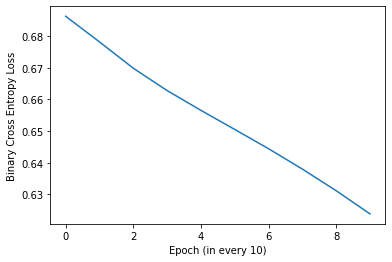

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

CONFIGURATION-2

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

input_dim = 28*28
num_epochs = 100
learning_rate = 0.0001
num_hidden = 300
output_dim = 1


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.Tanh()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 3rd hidden layer
        self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        probas = torch.sigmoid(probas)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)

criterion=nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
      Y_predicted = model(X_test)
      Y_predicted_cls = Y_predicted.round()
      acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
      print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy: {acc.item():.4f}')
      iteration_loss.append(loss.item())


with torch.no_grad():
    Y_predicted = model(X_test)
    Y_predicted_cls = Y_predicted.round()
    acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6837, accuracy: 0.5885
epoch: 20, loss = 0.6716, accuracy: 0.6021
epoch: 30, loss = 0.6628, accuracy: 0.6034
epoch: 40, loss = 0.6563, accuracy: 0.6137
epoch: 50, loss = 0.6489, accuracy: 0.6157
epoch: 60, loss = 0.6398, accuracy: 0.6222
epoch: 70, loss = 0.6292, accuracy: 0.6176
epoch: 80, loss = 0.6175, accuracy: 0.6254
epoch: 90, loss = 0.6033, accuracy: 0.6358
epoch: 100, loss = 0.5844, accuracy: 0.6377
accuracy: 0.6377


[0.6837330460548401, 0.671586811542511, 0.6628147959709167, 0.6562776565551758, 0.6488621234893799, 0.6398082375526428, 0.6291924715042114, 0.6174901723861694, 0.6033045649528503, 0.5843885540962219]


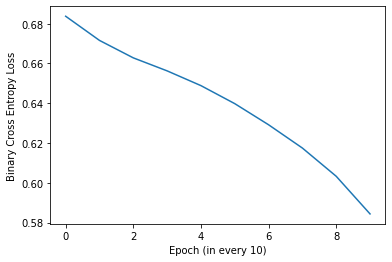

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

CONFIG-2 PREDICTION ON TEST DATA

In [ ]:
for i in range(795,805):
  print(Y_test[i]," ")

tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  


In [ ]:
predictions=model.forward(X_test[795:805])
predictions=predictions.round()

In [ ]:
print(predictions.detach().numpy())

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


CONFIGURATION-3

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

input_dim = 28*28
num_epochs = 100
learning_rate = 0.0001
num_hidden1 = 300
num_hidden2 = 500
num_hidden3 = 400
output_dim = 1


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden1, num_hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.Tanh()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden2, num_hidden3)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.Tanh()

        # ### 3rd hidden layer: 100 --> 100
        # self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        # ### Non-linearity in 3rd hidden layer
        # self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden3, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 3rd hidden layer
        # out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        probas = torch.sigmoid(probas)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)

criterion=nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

iteration_loss=[]
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
      Y_predicted = model(X_test)
      Y_predicted_cls = Y_predicted.round()
      acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
      print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy: {acc.item():.4f}')
      iteration_loss.append(loss.item())


with torch.no_grad():
    Y_predicted = model(X_test)
    Y_predicted_cls = Y_predicted.round()
    acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6515, accuracy: 0.6053
epoch: 20, loss = 0.6325, accuracy: 0.6124
epoch: 30, loss = 0.6143, accuracy: 0.6228
epoch: 40, loss = 0.6064, accuracy: 0.6215
epoch: 50, loss = 0.6070, accuracy: 0.6008
epoch: 60, loss = 0.5924, accuracy: 0.6176
epoch: 70, loss = 0.5802, accuracy: 0.6118
epoch: 80, loss = 0.5658, accuracy: 0.6150
epoch: 90, loss = 0.5543, accuracy: 0.6189
epoch: 100, loss = 0.5494, accuracy: 0.6170
accuracy: 0.6170


[0.6514616012573242, 0.6324713230133057, 0.6142852306365967, 0.6063638925552368, 0.606981635093689, 0.5923859477043152, 0.5802481770515442, 0.565815806388855, 0.5543085336685181, 0.5494325160980225]


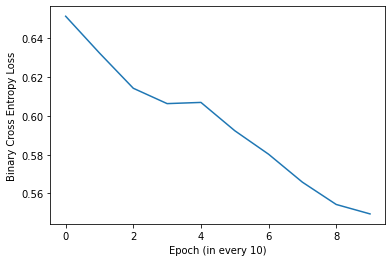

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

CONFIGURATION-4

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

input_dim = 28*28
num_epochs = 100
learning_rate = 0.0001
num_hidden1 = 200
num_hidden2 = 400
num_hidden3 = 300
output_dim = 1


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden1, num_hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden2, num_hidden3)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        # ### 3rd hidden layer: 100 --> 100
        # self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        # ### Non-linearity in 3rd hidden layer
        # self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden3, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 3rd hidden layer
        # out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        probas = torch.sigmoid(probas)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)

criterion=nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
for epoch in range(num_epochs):
    # Forward pass and loss
    Y_pred = model(X_train)
    loss = criterion(Y_pred, Y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
      Y_predicted = model(X_test)
      Y_predicted_cls = Y_predicted.round()
      acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
      print(f'epoch: {epoch+1}, loss = {loss.item():.4f}, accuracy: {acc.item():.4f}')
      iteration_loss.append(loss.item())


with torch.no_grad():
    Y_predicted = model(X_test)
    Y_predicted_cls = Y_predicted.round()
    acc = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6800, accuracy: 0.5774
epoch: 20, loss = 0.6685, accuracy: 0.5898
epoch: 30, loss = 0.6604, accuracy: 0.5982
epoch: 40, loss = 0.6533, accuracy: 0.6189
epoch: 50, loss = 0.6458, accuracy: 0.6261
epoch: 60, loss = 0.6375, accuracy: 0.6286
epoch: 70, loss = 0.6283, accuracy: 0.6241
epoch: 80, loss = 0.6181, accuracy: 0.6273
epoch: 90, loss = 0.6065, accuracy: 0.6267
epoch: 100, loss = 0.5926, accuracy: 0.6273
accuracy: 0.6273


[0.6800426244735718, 0.6685191988945007, 0.6604440808296204, 0.6533384919166565, 0.6458401679992676, 0.6374880075454712, 0.6282932162284851, 0.6181369423866272, 0.6064552664756775, 0.5925570726394653]


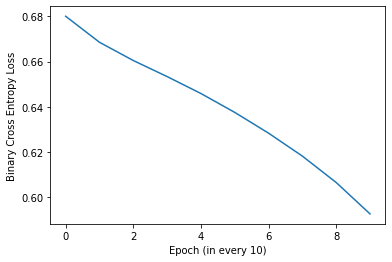

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch (in every 10)')
plt.show()

In [ ]:
for i in range(795,805):
  print(Y_test[i]," ")

tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  
tensor([1.])  


In [ ]:
predictions=model.forward(X_test[795:805])
predictions=predictions.round()

In [ ]:
print(predictions.detach().numpy())

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
